In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
from torchvision import datasets,transforms as T

transform = T.Compose([
      T.ToTensor(),
      T.Normalize((0.5), (0.5))
])


In [ ]:
trainset = datasets.MNIST('MNIST_data/', download= True, train= True, transform = transform)
testset = datasets.MNIST('MNIST_data/', download= True, train= False, transform = transform)

In [ ]:
print('Size of the trainset: {}'.format(len(trainset)))
print('Size of the testset: {}'.format(len(testset)))

Size of the trainset: 60000
Size of the testset: 10000


Text(0.5, 1.0, '4')

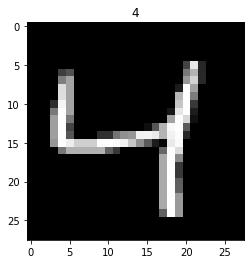

In [ ]:
index = 2
image, label = trainset[index]
plt.imshow(image.numpy().squeeze(), cmap = 'gray')
plt.title(label)


In [ ]:
#Task 2 : Splitting Dataset and Setting DataLoader Into Train,Test and Validation Set

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

valid_size = 0.2
num_train = len(trainset) #60000
split = int(np.floor(valid_size*num_train)) #12000
indices = list(range(num_train)) #[0,1,2,...59999]
np.random.shuffle(indices)
train_index, valid_index = indices[split:], indices[:split]

In [ ]:
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

In [ ]:
train_loader = DataLoader(trainset,batch_size=64,sampler=train_sampler)
valid_loader = DataLoader(trainset,batch_size=64,sampler=train_sampler)
test_loader = DataLoader(testset,batch_size=64,shuffle=True)

In [ ]:
dataiter = iter(train_loader)
images,labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
print('Batches in trainloader: {}'.format(len(train_loader)))
print('Batches in validloader: {}'.format(len(valid_loader)))
print('Batches in testloader: {}'.format(len(test_loader)))

print('Examples in trainloader: {}'.format(len(train_loader.sampler)))
print('Examples in validloader: {}'.format(len(valid_loader.sampler)))
print('Examples in testloader: {}'.format(len(test_loader.sampler)))

Batches in trainloader: 750
Batches in validloader: 750
Batches in testloader: 157
Examples in trainloader: 48000
Examples in validloader: 48000
Examples in testloader: 10000


In [ ]:
#Task 3 : Creating Neural Network or Model

In [ ]:
from torch import nn
import torch.nn.functional as F

class Classifier(nn.Module):

  def __init__(self):
    super(Classifier,self).__init__()

    self.linear1 = nn.Linear(784,256)
    self.linear2 = nn.Linear(256,128)
    self.linear3 = nn.Linear(128,10)

    self.dropout = nn.Dropout(p = 0.4)

  def forward(self,images):

    images = images.view(images.shape[0], -1) #change image shape from (64,1,28,28) to (64, 1*28*28) which is (64,784)
    z1 = self.linear1(images)
    a1 = self.dropout(F.relu(z1))

    z2 = self.linear2(a1)
    a2 = self.dropout(F.relu(z2))

    
    z3 = self.linear3(a2)
    a3 = F.log_softmax(z3, dim = 1)

    return a3


In [ ]:
model = Classifier()
model

Classifier(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [ ]:
from torchsummary import summary
summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
           Dropout-2                  [-1, 256]               0
            Linear-3                  [-1, 128]          32,896
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.90
Estimated Total Size (MB): 0.91
----------------------------------------------------------------


In [ ]:
#Task 4 : Training Neural Network

In [ ]:
from torch import optim
from utils import multiclass_accuracy,view_classify

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
epochs = 10


In [ ]:
for e in range(epochs):

  train_loss = 0.0
  valid_loss = 0.0
  valid_acc = 0.0

  model.train()

  for images,labels in train_loader:

    logps = model(images)
    optimizer.zero_grad()
    loss = criterion(logps,labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  model.eval()

  for images,labels in valid_loader:
    logps = model(images)
    ps = torch.exp(logps)
    loss = criterion(logps,labels)
    valid_acc += multiclass_accuracy(ps,labels)
    valid_loss += loss.item()

  train_loss = train_loss/len(train_loader)
  valid_loss = valid_loss/len(valid_loader)
  valid_acc = valid_acc/len(valid_loader)

  print("Epoch : {} Train Loss : {:.4f} Valid Loss : {:.4f} Valid Acc : {}".format(e+1, train_loss, valid_loss, valid_acc))

Epoch : 1 Train Loss : 0.6097 Valid Loss : 0.2946 Valid Acc : 0.9087916612625122
Epoch : 2 Train Loss : 0.4392 Valid Loss : 0.2545 Valid Acc : 0.9215624928474426
Epoch : 3 Train Loss : 0.4057 Valid Loss : 0.2078 Valid Acc : 0.9384166598320007
Epoch : 4 Train Loss : 0.3833 Valid Loss : 0.1824 Valid Acc : 0.9463750123977661
Epoch : 5 Train Loss : 0.3702 Valid Loss : 0.1971 Valid Acc : 0.9421666860580444
Epoch : 6 Train Loss : 0.3612 Valid Loss : 0.1687 Valid Acc : 0.9503958225250244
Epoch : 7 Train Loss : 0.3500 Valid Loss : 0.1734 Valid Acc : 0.9465000033378601
Epoch : 8 Train Loss : 0.3359 Valid Loss : 0.1644 Valid Acc : 0.953000009059906
Epoch : 9 Train Loss : 0.3375 Valid Loss : 0.1819 Valid Acc : 0.9451249837875366
Epoch : 10 Train Loss : 0.3357 Valid Loss : 0.1773 Valid Acc : 0.9481458067893982


In [ ]:
#Task 5 : Evaluating the model

In [ ]:
model.eval()

test_loss = 0.0
test_acc = 0.0

for images,labels in test_loader:

    logps = model(images)
    ps = torch.exp(logps)
    loss = criterion(logps,labels)
    test_acc += multiclass_accuracy(ps,labels)
    test_loss += loss.item()

test_loss = test_loss/len(test_loader)
test_acc = test_acc/len(test_loader)

print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))

Test loss: 0.19107268038828662 Test accuracy: 0.9428741931915283


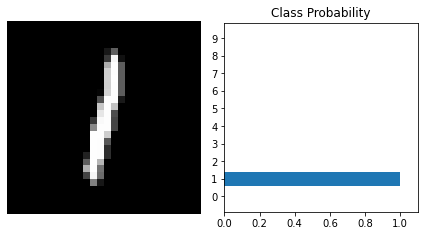

In [ ]:
dataiter = iter(test_loader)
images,labels = dataiter.next()

index = 7
logps = model(images[index])
ps = torch.exp(logps)

view_classify(images[index],ps)